Conectando a Conta Google (opcional)

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

## Text Processing
Processamento do Texto

# Abaixo irei tratar o texto do audio para que esteja corrigido dentro do contexto.
* Gerar insights;
* Criar padrões;
* Treinar os modelos;
* Avaliar os modelos;
* Refinar parametros e hiperparametros.

In [16]:
import pandas as pd

# Criação do DataFrame para armazenar frases e etiquetas
data_annotated = pd.read_excel('/content/dados_ecolalia.xlsx', sheet_name='ecolalia_separated')
data = pd.DataFrame(data_annotated)

# Exibir o DataFrame
data.columns

Index(['sentence_1', 'sentence_2', 'label'], dtype='object')

In [17]:
data.head()

,sentence_1,sentence_2,label
0,Vamos jogar,vamos jogar!,0
1,O céu é azul,o céu é azul.,0
2,Eu gosto de cachorro,eu gosto de cachorro.,0
3,Está chovendo,está chovendo.,0
4,Hora de comer,hora de comer!,0


### Após a notação manual, será necessário exportar a planilha alterada (visto que neste caso os dados foram criados para a pesquisa)

In [18]:
!pip install wordcloud

# Pré-processar o Texto

### Vamos garantir que o texto esteja limpo e tokenizado, e remover stop words.


In [19]:
!pip install pandas scikit-learn nltk

In [20]:
import re
import string
import nltk # Import the nltk module
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Função para limpar e tokenizar texto
def preprocess_text(text):
    # Converting to lower case
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Removing extra spaces and newlines
    text = re.sub(r'\s+', ' ', text)
    # Tokenizing
    tokens = word_tokenize(text)
    # Removing stop words
    stop_words = set(stopwords.words('portuguese'))
    clean_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(clean_tokens)

# Aplicar pré-processamento nas frases
data_annotated['sentence_1'] = data_annotated['sentence_1'].apply(preprocess_text)
data_annotated['sentence_2'] = data_annotated['sentence_2'].apply(preprocess_text)
data['label'] = 0  # Inicialmente, atribuir 0 para todas as frases
data_annotated.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentence_1,sentence_2,label
0,vamos jogar,vamos jogar,0
1,céu azul,céu azul,0
2,gosto cachorro,gosto cachorro,0
3,chovendo,chovendo,0
4,hora comer,hora comer,0
5,viu brinquedo,viu brinquedo,0
6,hora ir,hora ir,0
7,mamãe disse sim,mamãe disse sim,0
8,vamos passear,vamos passear,0
9,tudo bem,tudo bem,0


In [21]:
# Aplicar pré-processamento nas frases
data_annotated['clean_sentence_1'] = data_annotated['sentence_1'].apply(preprocess_text)
# Juntar todas as frases pré-processadas em um único texto
all_text = ' '.join(data_annotated['clean_sentence_1'])

In [22]:
# # Aplicar pré-processamento nas frases
data_annotated['clean_sentence_2'] = data_annotated['sentence_2'].apply(preprocess_text)
# # Juntar todas as frases pré-processadas em um único texto
all_text = ' '.join(data_annotated['clean_sentence_2'])

In [23]:
# Juntar todas as frases pré-processadas em um único texto
all_text = ' '.join(data_annotated['clean_sentence_1'].tolist() + data_annotated['clean_sentence_2'].tolist())

In [24]:
data_annotated['clean_sentence_2']

,clean_sentence_2
0,vamos jogar
1,céu azul
2,gosto cachorro
3,chovendo
4,hora comer
...,...
595,emocionante
596,vou querer saber
597,empolgado
598,ida maravilhosa


#Gerando a Nuvem de Palavras - WordCloud

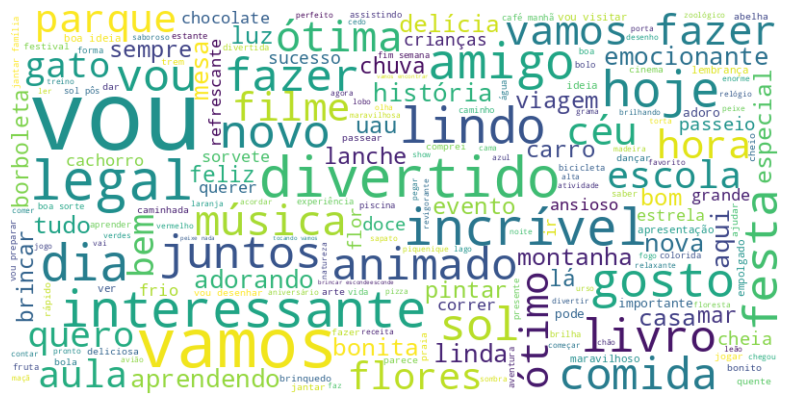

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, max_font_size=100,
                      max_words=200, background_color='white').generate(all_text)

# Visualizar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Não mostrar os eixos
plt.show()

In [26]:
!pip install pandas scikit-learn nltk

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Função para determinar similaridade entre duas colunas de frases
def check_similarity(sentences_1, sentences_2):
    # Combinar as frases de ambas as colunas em uma só lista para vetorização
    combined_sentences = sentences_1.tolist() + sentences_2.tolist()

    # Criar um vetor TF-IDF das frases combinadas
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(combined_sentences)

    # Calcular a similaridade do cosseno
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Inicializar uma lista para os rótulos
    labels = []
    n_sentences_1 = len(sentences_1)

    for i in range(n_sentences_1):
        # Comparar a frase da sentenca_1 (índice i) com todas as frases da sentenca_2 (índices de n_sentences_1 em diante)
        if any(cosine_sim[i][j] > 0.5 for j in range(n_sentences_1, len(combined_sentences))):
            labels.append(1)  # Similaridade encontrada
        else:
            labels.append(0)  # Sem similaridade

    return labels

# Aplique a função de similaridade entre as duas colunas
data_annotated['label'] = check_similarity(data_annotated['clean_sentence_1'], data_annotated['clean_sentence_2'])

# Exibir o DataFrame com o rótulo
data_annotated[['clean_sentence_1','clean_sentence_2', 'label']].head(30)


,clean_sentence_1,clean_sentence_2,label
0,vamos jogar,vamos jogar,1
1,céu azul,céu azul,1
2,gosto cachorro,gosto cachorro,1
3,chovendo,chovendo,1
4,hora comer,hora comer,1
5,viu brinquedo,viu brinquedo,1
6,hora ir,hora ir,1
7,mamãe disse sim,mamãe disse sim,1
8,vamos passear,vamos passear,1
9,tudo bem,tudo bem,1


In [29]:
# pd.to_excel('dados_ecolalia_annotated.xlsx', index=False)

# Extrair Características
### Usaremos TF-IDF para converter o texto em vetores de características.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenar as sentenças
data_annotated['combined_sentences'] = (data_annotated['clean_sentence_1'] + " " +
                                         data_annotated['clean_sentence_2'])

# Vetorização usando ambas as sentenças
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data_annotated['combined_sentences']).toarray()  # Usando a nova coluna combinada
y = data_annotated['label']

print(X.shape)


(600, 875)


#Dividir o Conjunto de Dados em Treino e Teste - Random Forest

In [31]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(480, 875) (120, 875)


#Treinar um Modelo de Classificação

### Usaremos Random Forest como exemplo.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o Modelo

### Vamos avaliar o modelo usando métricas como precisão, recall e F1-score.

In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7916666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.45      0.59        40
           1       0.78      0.96      0.86        80

    accuracy                           0.79       120
   macro avg       0.82      0.71      0.73       120
weighted avg       0.80      0.79      0.77       120



# Utilizando BERT e BERTimbaum

In [34]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

### Dividir o Conjunto de Dados em Treino e Teste

In [35]:
from sklearn.model_selection import train_test_split  # Importe a função train_test_split

# Combinar as sentenças limpas
data_annotated['combined_sentences'] = (data_annotated['clean_sentence_1'] + " " +
                                         data_annotated['clean_sentence_2'])

# Dividir o conjunto de dados em treino e teste usando a coluna combinada
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data_annotated['combined_sentences'], data_annotated['label'], test_size=0.2, random_state=42)

# Agora, train_texts e test_texts contêm as sentenças combinadas de treino e teste


#Carregar o Modelo BERT e Tokenizer
### Vamos usar o modelo bert-base-multilingual-cased da Hugging Face. Se você preferir um modelo específico para português, pode usar o neuralmind/bert-base-portuguese-cased

In [36]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

# Carregar tokenizer e modelo
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = BertForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased', num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Preparar os Dados para o BERT
###Precisamos tokenizar os textos e criar um dataset apropriado para o modelo.

In [37]:
# Função para tokenizar os textos
def tokenize_texts(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Tokenizar os textos de treino e teste
train_encodings = tokenize_texts(train_texts.tolist())
test_encodings = tokenize_texts(test_texts.tolist())

# Criar tensores de labels
train_labels_tensor = torch.tensor(train_labels.values)
test_labels_tensor = torch.tensor(test_labels.values)

# Criar dataset customizado
class EcolaliaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Criar datasets de treino e teste
train_dataset = EcolaliaDataset(train_encodings, train_labels_tensor)
test_dataset = EcolaliaDataset(test_encodings, test_labels_tensor)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#Configurar o Treinamento e Treinar o Modelo

In [38]:
# Definir os parâmetros de treinamento
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Criar o Trainer
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

# Treinar o modelo
trainer.train()


<ipython-input-37-25e8e576d2be>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-37-25e8e576d2be>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Step,Training Loss
10,0.700300
20,0.692200
30,0.662100
40,0.700200
50,0.670200
60,0.625200
70,0.597400
80,0.579200
90,0.491600
100,0.482500


TrainOutput(global_step=180, training_loss=0.48220103051927354, metrics={'train_runtime': 693.2426, 'train_samples_per_second': 2.077, 'train_steps_per_second': 0.26, 'total_flos': 11839997491200.0, 'train_loss': 0.48220103051927354, 'epoch': 3.0})

##Avaliar o Modelo
###Vamos avaliar o desempenho do modelo nos dados de teste.

In [39]:
# Avaliar o modelo
results = trainer.evaluate()
print("Results:", results)

<ipython-input-37-25e8e576d2be>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-37-25e8e576d2be>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Results: {'eval_loss': 0.2998025119304657, 'eval_runtime': 9.1054, 'eval_samples_per_second': 13.179, 'eval_steps_per_second': 1.647, 'epoch': 3.0}


In [40]:
# Fazer previsões
predictions = trainer.predict(test_dataset)
# Convert predictions to PyTorch tensor
preds = torch.argmax(torch.tensor(predictions.predictions), dim=1)

# Relatório de classificação
print(classification_report(test_labels, preds))

<ipython-input-37-25e8e576d2be>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-37-25e8e576d2be>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.93      0.89      0.91        80

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



# Navies Bayers

In [41]:
from sklearn.model_selection import train_test_split  # Importe a função train_test_split

# Combinar as sentenças limpas
data_annotated['combined_sentences'] = (data_annotated['clean_sentence_1'] + " " +
                                         data_annotated['clean_sentence_2'])

# Dividir o conjunto de dados em treino e teste usando a coluna combinada
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data_annotated['combined_sentences'], data_annotated['label'], test_size=0.2, random_state=42)

# Agora, train_texts e test_texts contêm as sentenças combinadas de treino e teste

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Vetorização
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Treinamento
nb_model = MultinomialNB()
nb_model.fit(X_train, train_labels)

# Avaliação
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Classification Report")
print(classification_report(test_labels, nb_preds))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.85      0.28      0.42        40
           1       0.73      0.97      0.83        80

    accuracy                           0.74       120
   macro avg       0.79      0.62      0.62       120
weighted avg       0.77      0.74      0.69       120



In [45]:
# Salvar o modelo e o vetorizer
import pickle  # Import the pickle module
# Salvar o modelo e o vetorizer
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Modelo e vetorizer salvos com sucesso!")

Modelo e vetorizer salvos com sucesso!


# Executando e Testando Modelos

In [46]:
!pip install flask torch transformers pyngrok

In [47]:
from pyngrok import ngrok

# Substitua 'YOUR_AUTHTOKEN' pelo seu token de autenticação
ngrok.set_auth_token('2kQzAfeWHh0rhi4UdMzV366q42E_7rQocD4d5YnbyeEq1Hgvb')

In [48]:
from flask import Flask, request, jsonify
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
from threading import Thread
from pyngrok import ngrok

# Inicializando o Flask app
app = Flask(__name__)

# Carregar o modelo Naive Bayes e o vetor TF-IDF
with open('naive_bayes_model.pkl', 'rb') as model_file:
    nb_model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

@app.route('/classify_ecolalia', methods=['POST'])
def classify_ecolalia():
    data = request.json
    sentence_1 = data['sentence_1']
    sentence_2 = data['sentence_2']

    # Concatenar as sentenças
    input_text = f"{sentence_1} {sentence_2}"

    # Vetorização
    input_vector = vectorizer.transform([input_text])

    # Previsão
    prediction = nb_model.predict(input_vector)
    label = prediction[0]

    return jsonify({'label': int(label), 'description': 'Ecolalia' if label == 1 else 'Não Ecolalia'})

# Função para iniciar o Flask
def run_flask():
    app.run()

# Configurar o Authtoken para o ngrok
ngrok.set_auth_token('2kQzAfeWHh0rhi4UdMzV366q42E_7rQocD4d5YnbyeEq1Hgvb')  # Substitua 'YOUR_AUTHTOKEN' pelo seu token

# Inicializando o Flask em uma thread
thread = Thread(target=run_flask)
thread.start()

# Criando um túnel ngrok para acesso externo
public_url = ngrok.connect(5000)
print(f"Flask app está disponível em: {public_url}")


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Flask app está disponível em: NgrokTunnel: "https://d5a8-34-44-53-145.ngrok-free.app" -> "http://localhost:5000"


In [52]:
import requests
import json

public_url = 'https://d5a8-34-44-53-145.ngrok-free.app'
# Definir a URL da sua API (substitua pelo URL gerado pelo ngrok)
url = public_url + '/classify_ecolalia'

# Dados a serem enviados
data = {
    'sentence_1': 'Eu quero brincar.',
    'sentence_2': 'eu quero brincar.'
}

# Realizando a requisição POST
response = requests.post(url, json=data)

# Exibindo o resultado
print(response.json())


INFO:werkzeug:127.0.0.1 - - [10/Aug/2024 00:45:38] "POST /classify_ecolalia HTTP/1.1" 200 -


{'description': 'Ecolalia', 'label': 1}
